In [12]:
import cv2                     # For face detection and image processing
from deepface import DeepFace  # For emotion analysis
import matplotlib.pyplot as plt  # For displaying images in Jupyter Notebook


In [13]:
# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [14]:
def detect_emotion_in_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error loading image.")
        return

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop through all detected faces
    for (x, y, w, h) in faces:
        # Crop the face from the image
        face = image[y:y+h, x:x+w]

        # Use DeepFace to analyze the emotion of the detected face
        result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)

        # Extract the dominant emotion
        dominant_emotion = result[0]['dominant_emotion']

        # Draw a rectangle around the face and display the detected emotion
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, dominant_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convert the image to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detected faces and emotions
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes for better presentation
    plt.show()


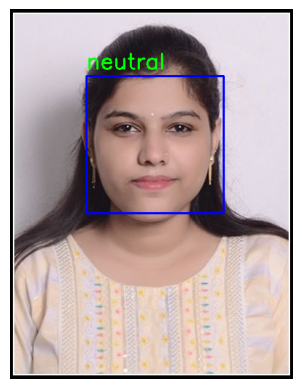

In [15]:
# Test the function with an image path
image_path = image_path = r'C:\Users\chait\Downloads\Photo.jpeg'
  # Replace with your image path
detect_emotion_in_image(image_path)


In [16]:
# Start the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]

        # Use DeepFace to analyze the emotion of the detected face
        result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']

        # Draw rectangle and show emotion
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, dominant_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame with emotion detection
    cv2.imshow('Emotion Detection', frame)

    # Exit the webcam on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
